In [1]:
import pandas as pd

In [33]:
df = pd.read_csv("results (2).csv")

points = []

# for _, row in df.iterrows():
#     methods[row['method']] = {}

for _, row in df.iterrows():
    points.append({
        'method': row['method'],
        'mse': row['mse'],
        'time': row['time'],
    })

Linear
KNN
Tikhonov
Ours


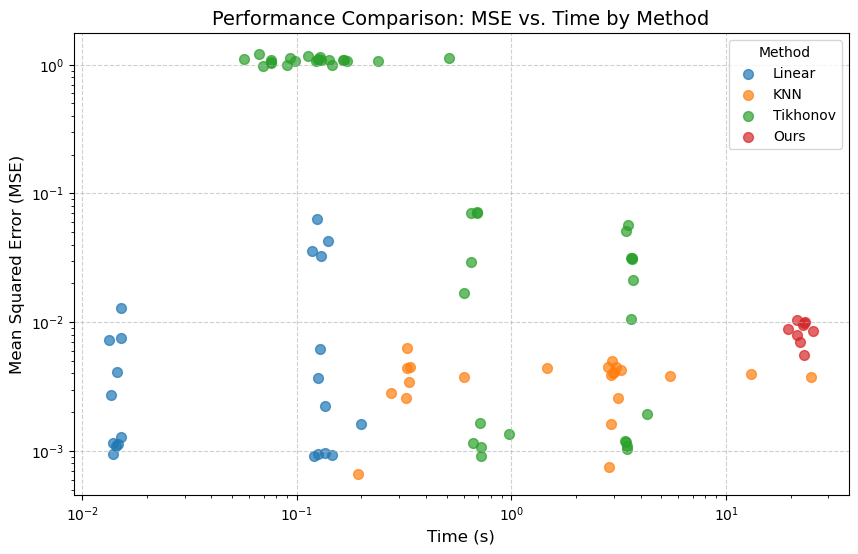

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is the DataFrame you are iterating over
# (A simulated DataFrame was used for execution)
df = pd.read_csv("results (2).csv")

fig, ax = plt.subplots(figsize=(10, 6))

# Get unique methods for coloring
methods = df['method'].unique()

marker = {
    'random': 's',
    'blackout': '^',
    'maintenance': 'o',
}

for method in methods:
    print(method)
    # Filter data for the current method
    subset_base = df[np.logical_and(df['method'] == method, df['stage'] == 'test')]
    subset_time = subset_base
    subset_mse = subset_base
    if method == 'tikhonov':
        idxs = np.logical_and(df['method'] == method, df['stage'] == 'test')
        idxs = np.logical_and(idxs, df['full_graph'])
        subset_time = df[np.logical_and(idxs, df['gpu'])]
        subset_mse = df[np.logical_and(idxs, np.logical_not(df['gpu']))]
    
    # Create the scatter plot for this method, generating a unique color for each call
    c = len(subset_time['time'])
    ax.scatter(
        subset_time['time'],
        subset_mse['mse'],
        label=method, # Label for the legend
        s=50, # Size of the points
        alpha=0.7, # Transparency,
        # marker='^',
    )

# Add labels and title
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax.set_title('Performance Comparison: MSE vs. Time by Method', fontsize=14)

# Add legend to show method color
ax.legend(title='Method')

# Add grid for better readability
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True, linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('scatter_plot_mse_vs_time.png')

[0.244375, 2.0151250000000003, 0.3457489146126641, 11.621176600456238, 12.4, 22.4923906856113]


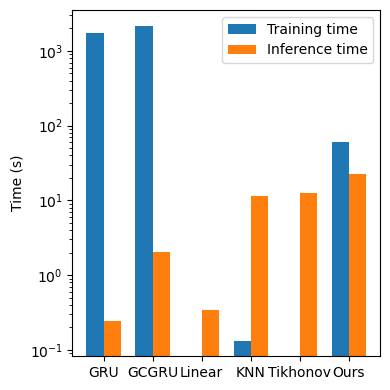

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4, 4))

df = pd.read_csv("results (2).csv")

# Data
methods = ['GRU', 'GCGRU', 'Linear', 'KNN', 'Tikhonov', 'Ours']
train_times = [
    df[np.logical_and(df['method'] == 'GRU', df['gpu'])]['time'].mean(), 
    df[np.logical_and(df['method'] == 'GCGRU', df['gpu'])]['time'].mean(),
    0,
    0.13305306434631348, 
    0, 
    60
]
# inference_times = [0, 1, 3.416823625564575, df[df['method']]]
inference_times = []
for method in methods:
    if method == 'Tikhonov':
        inference_times.append(12.4)
    if method == 'GRU':
        inference_times.append(df[np.logical_and(df['method'] == method, df['gpu'])]['infer'].mean())
    if method == 'GCGRU':
        inference_times.append(df[np.logical_and(df['method'] == method, df['gpu'])]['infer'].mean())
    if method in ['Ours']:
        inference_times.append(df[np.logical_and(df['method'] == method, df['gpu'])]['time'].mean())
    if method in ['Linear', 'KNN']:
         inference_times.append(df[df['method'] == method]['time'].mean())

print(inference_times)

# Create stacked bars
x = np.arange(len(methods))

width = 0.35  # The width of the bars

# Adjust x-coordinates for side-by-side plotting
# The first set of bars (Training time) is shifted left by half the width
plt.bar(x - width/2, train_times, width, label='Training time')

# The second set of bars (Inference time) is shifted right by half the width
# NOTE: The 'bottom' argument is removed.
plt.bar(x + width/2, inference_times, width, label='Inference time')

# Set x-ticks to the center position (x) for labels
plt.xticks(x, methods)
plt.ylabel('Average time accross experiments (s)')
plt.yscale('log')
# plt.title('Training vs. Inference Times (Side-by-Side)')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
df1 = pd.read_csv('../main_method/main_method_results_1.csv')
print(df1['mse'].mean(), df1['mse'].var())

df2 = pd.read_csv('../main_method/main_method_results.csv')
print(df2['mse'].mean(), df2['mse'].var())

0.008641013482720679 2.538798066215134e-06
0.007731975153369133 8.748708672320169e-06


Linear
KNN
Tikhonov
Ours
GRU
GCGRU


C:\Users\pskul\AppData\Local\Temp\ipykernel_26512\316732532.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_time['time'] += 60


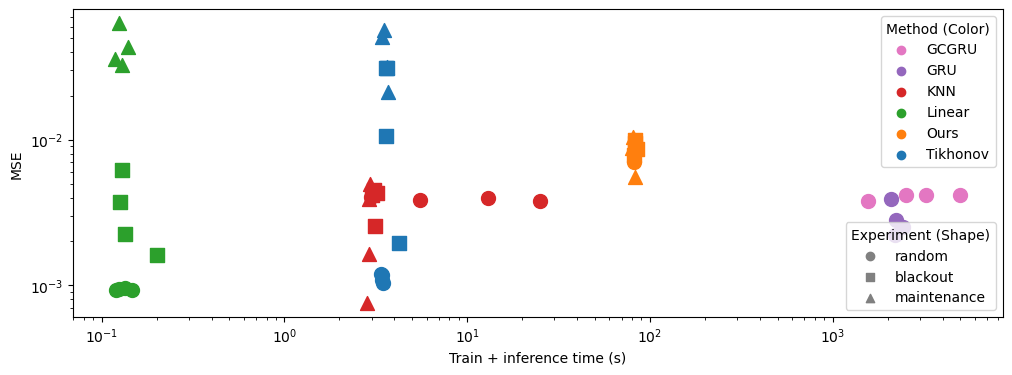

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample Data
# data = {
#     'Method': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'B', 'C'],
#     'Experiment': ['Exp1', 'Exp2', 'Exp1', 'Exp2', 'Exp1', 'Exp2', 'Exp3', 'Exp3', 'Exp3'],
#     'X_Value': np.random.rand(9) * 10,
#     'Y_Value': np.random.rand(9) * 50
# }

data = {
    'Method': [],
    'Experiment': [],
    'X_Value': [],
    'Y_Value': [],
}

df = pd.read_csv("results (2).csv")

methods = df['method'].unique()

for method in methods:
    print(method)
    # Filter data for the current method
    fg = True
    if method == 'GRU' or method == 'GCGRU':
        fg = False
    subset_base = df[np.logical_and(np.logical_and(df['method'] == method, df['stage'] == 'test'), df['full_graph'] == fg)]
    subset_time = subset_base
    subset_mse = subset_base
    if method == 'Tikhonov':
        idxs = np.logical_and(df['method'] == method, df['stage'] == 'test')
        idxs = np.logical_and(idxs, df['full_graph'])
        subset_mse = df[np.logical_and(idxs, df['gpu'])]
        subset_time = df[np.logical_and(idxs, np.logical_not(df['gpu']))]

    if method == 'Ours':
        subset_time['time'] += 60

    data['Method'].extend([method] * len(subset_time))
    data['Experiment'].extend(list(subset_time['experiment']))
    data['X_Value'].extend(list(subset_time['time']))
    data['Y_Value'].extend(list(subset_time['mse']))
    
    # Create the scatter plot for this method, generating a unique color for each call
    # c = len(subset_time['time'])
    # ax.scatter(
    #     subset_time['time'],
    #     subset_mse['mse'],
    #     label=method, # Label for the legend
    #     s=50, # Size of the points
    #     alpha=0.7, # Transparency,
    #     # marker='^',
    # )

df = pd.DataFrame(data)

# 🎨 Color Mapping for Methods
method_colors = {
    'Tikhonov': 'tab:blue',
    'KNN': 'tab:red',
    'Linear': 'tab:green',
    'Ours': 'tab:orange',
    'GRU': 'tab:purple',
    'GCGRU': 'tab:pink',
}

# 📌 Marker Mapping for Experiments
experiment_markers = {
    'random': 'o',  # Circle
    'blackout': 's',  # Square
    'maintenance': '^'   # Triangle
}

# 📝 To collect handles for the legend
method_handles = {}
experiment_handles = {}

fig, ax = plt.subplots(figsize=(12, 4))

for method, group_m in df.groupby('Method'):
    color = method_colors[method]
    
    for experiment, group_e in group_m.groupby('Experiment'):
        marker = experiment_markers[experiment]
        
        # Plot the subset
        scatter = ax.scatter(
            group_e['X_Value'],
            group_e['Y_Value'],
            color=color,
            marker=marker,
            s=100, # size
            label=f"{method} - {experiment}" # Label for reference, but we'll build the final legend manually
        )
        
        # Store ONE handle for each unique method (use the circle marker for consistency)
        if method not in method_handles:
            # Create a dummy object/handle using the desired color and a standard marker (circle)
            method_handles[method] = ax.scatter([], [], color=color, marker='o', label=method)
            
        # Store ONE handle for each unique experiment (use a neutral gray color)
        if experiment not in experiment_handles:
            # Create a dummy object/handle using the desired marker and a neutral gray color
            experiment_handles[experiment] = ax.scatter([], [], color='gray', marker=marker, label=experiment)


ax.set_xlabel("Train + inference time (s)")
ax.set_ylabel("MSE")
# ax.set_title("Results Differentiated by Color (Method) and Marker (Experiment)")
# Get the handles and labels for the two groups
method_list = list(method_handles.values())
method_labels = list(method_handles.keys())

experiment_list = list(experiment_handles.values())
experiment_labels = list(experiment_handles.keys())

ax.set_yscale('log')
ax.set_xscale('log')

# --- Legend 1: Methods (Color) ---
# Location 1: Top right
legend1 = ax.legend(
    method_list,
    method_labels,
    title="Method (Color)",
    loc='upper right',
    frameon=True,
    scatterpoints=1
)

# --- Legend 2: Experiments (Marker) ---
# Add the first legend manually back to the axis
ax.add_artist(legend1) 

# Location 2: Bottom right
legend2 = ax.legend(
    experiment_list,
    experiment_labels,
    title="Experiment (Shape)",
    loc='lower right',
    frameon=True,
    scatterpoints=1
)

# plt.figure(figsize=(10, 6))

plt.show()

3


PearsonRResult(statistic=0.7398080824198872, pvalue=8.35799536757496e-10)

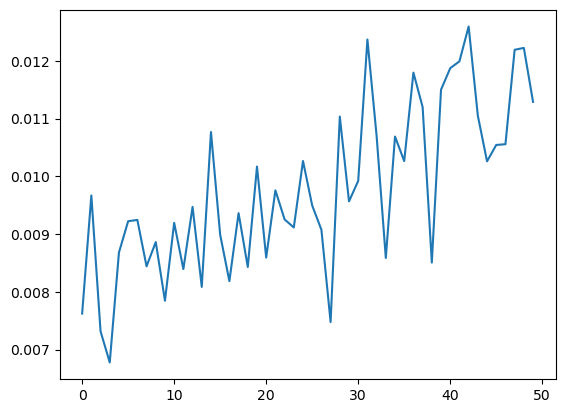

In [71]:
from scipy.stats import pearsonr

ys = [0.007622922159310918, 0.00966760570265517, 0.0073167636865855866, 0.006776145878768352, 0.008680191839220976, 0.009221844677523098, 0.009243953246286402, 0.008440744809858807, 0.00886066367045991, 0.00784492157228317, 0.0091930146891945, 0.00839312597621186, 0.009469968353298946, 0.008084193035955848, 0.010765934876061386, 0.00898661009425565, 0.008184721122458407, 0.009360743950238821, 0.008429186188352672, 0.010167758982915514, 0.00859252639426452, 0.00975573457115303, 0.0092534397804992, 0.009113082419121104, 0.010265005630421232, 0.00949357842665529, 0.009074608350644879, 0.007475829331264906, 0.011033363936224483, 0.009564963565711305, 0.009919881466189174, 0.0123677826322636, 0.010697608958101651, 0.008584970333120421, 0.010687602310749838, 0.010262536394537945, 0.011794430029566655, 0.011198645106444196, 0.008505309634504177, 0.011499143014584757, 0.011871449410418611, 0.011989684834519659, 0.012593210736120835, 0.011048567960945206, 0.010258296084452197, 0.010542154646977185, 0.010554671160759223, 0.01218958087256197, 0.012222152210198395, 0.011287355592514885]
xs = np.arange(1,51)

print(np.argmin(ys))

# np.corr

plt.plot(ys)

pearsonr(xs, ys)